Text(0.5, 0.98, 'Center slices for image')

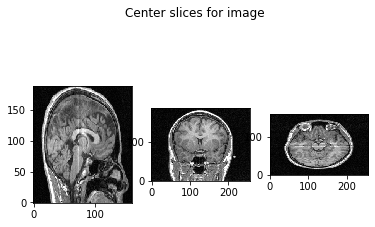

In [7]:
# Import os
import sys
from pathlib import Path

from mne_bids import make_bids_basename
# Define entities and the basename
subject = 'la02'
session = 'presurgery'
bids_basename = make_bids_basename(subject=subject, session=session, processing='robustfov', suffix='T1w.nii')

# Define bids root and the file path to image
bids_root = Path("C:\\Users\\d0156\\Dropbox\\bids_layout_data")
img_fpath = bids_root / f'sub-{subject}' / f'ses-{session}' / 'anat' / bids_basename

import nibabel as nib 
import numpy as np

# load image
img = nib.load(img_fpath)
img_data = img.get_fdata()

# Re-orient image to RAS coordinates
ras_img = nib.as_closest_canonical(img)
ras_img_data = ras_img.get_fdata()

# Visualize slices
import matplotlib.pyplot as plt
def show_slices(slices):
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = ras_img_data[128, :, :]
slice_1 = ras_img_data[:, 94, :]
slice_2 = ras_img_data[:, :, 80]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for image")